<a href="https://colab.research.google.com/github/mateusz800/handwritten-digits-recognition/blob/master/mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import matplotlib.pyplot as plt

from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, MaxPool2D
from keras.utils import to_categorical
from keras.preprocessing.image import ImageDataGenerator

Reading data

In [0]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [141]:
x_train.shape

(60000, 28, 28)

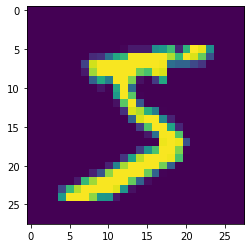

In [142]:
plt.imshow(x_train[0])

Generating more input data

In [143]:
x_train = x_train.reshape(*x_train.shape,1)
x_test = x_test.reshape(*x_test.shape,1)
x_train.shape

(60000, 28, 28, 1)

In [0]:
datagen = ImageDataGenerator(
    featurewise_center=True,
    featurewise_std_normalization=True,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    rescale=1./255)
datagen.fit(x_train)

In [0]:

x_test = x_test/255

y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [0]:
model = Sequential([
    Conv2D(32, input_shape=x_train[0].shape, kernel_size=(2,2)),
    Conv2D(64, kernel_size=(2,2)),
    MaxPool2D(pool_size=(2,2)),
    Dense(128, activation='relu'),
    Dense(64,activation='relu'),
    Flatten(),
    Dense(10, activation='softmax')
])
model.compile(loss='categorical_crossentropy', optimizer='adam')

In [147]:
model.summary()

Model: "sequential_20"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_30 (Conv2D)           (None, 27, 27, 32)        160       
_________________________________________________________________
conv2d_31 (Conv2D)           (None, 26, 26, 64)        8256      
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 13, 13, 64)        0         
_________________________________________________________________
dense_31 (Dense)             (None, 13, 13, 128)       8320      
_________________________________________________________________
dense_32 (Dense)             (None, 13, 13, 64)        8256      
_________________________________________________________________
flatten_19 (Flatten)         (None, 10816)             0         
_________________________________________________________________
dense_33 (Dense)             (None, 10)              

In [148]:
history = model.fit_generator(datagen.flow(x_train, y_train, batch_size=32),
                    steps_per_epoch=len(x_train) / 32, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 142s 76ms/step - loss: 2.3020
Epoch 2/10
1875/1875 [==============================] - 142s 75ms/step - loss: 2.3014
Epoch 3/10
1875/1875 [==============================] - 144s 77ms/step - loss: 2.3014
Epoch 4/10
1875/1875 [==============================] - 144s 77ms/step - loss: 2.3013
Epoch 5/10
1875/1875 [==============================] - 142s 76ms/step - loss: 2.3013
Epoch 6/10
1875/1875 [==============================] - 142s 76ms/step - loss: 2.3014
Epoch 7/10
1875/1875 [==============================] - 143s 76ms/step - loss: 2.3013
Epoch 8/10
1875/1875 [==============================] - 143s 76ms/step - loss: 2.3014
Epoch 9/10
1875/1875 [==============================] - 142s 76ms/step - loss: 2.3013
Epoch 10/10
1875/1875 [==============================] - 144s 77ms/step - loss: 2.3013


{'loss': [2.309872798029582,
  2.288153626759847,
  2.211539757537842,
  2.0758446245829263,
  1.9847274253209433,
  1.9400839502334595,
  1.920302015240987,
  1.896274241956075,
  1.8772094975153606,
  1.873337729771932]}

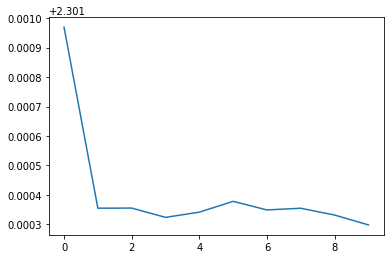

In [149]:
plt.figure()
plt.plot(history.history['loss'])

Saving model to file

In [150]:
cd "/content/drive/My Drive/"

/content/drive/My Drive


In [0]:
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
model.save_weights("model.h5")